# Similarity/correlation/dependence measure

**The Similarity  measure** in machine learning is usually described as a distance with dimensions representing features of the objects. If this distance is small it will be the high degree of similarity where large distance will be the low degree of similarity. Similarity is subjective and is highly dependent on the domain and application. The relative values of each feature must be normalized or one feature could end up dominating the distance calculation. Similarity are measured in the range 0 to 1 [0,1].

See <dataaspirant> (http://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/) for more detailed introduction to the most popular similarity measures and their implementation in python. 

See <scipy> (https://docs.scipy.org/doc/scipy-0.18.1/reference/spatial.distance.html) for all available distance metrics in scipy.spatial module

In [1]:
import scipy.spatial.distance as ds

u = [0, 1, 2];
v = [3, 4, 5];

print("euclindian %f" %ds.euclidean(u, v))
print("manhattan %f" %ds.minkowski(u, v, p=1))


euclindian 5.196152
manhattan 9.000000


### Pearson Correlation

Extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.

Peason Correlation can capture only linear correlation. 

<img style="float: left;" src="img/correlation.gif" height="270" width="270">

<br>
<br>
<br>

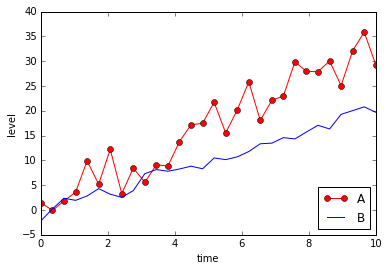

In [4]:
%matplotlib inline  
import numpy as np
from scipy.stats import stats


import matplotlib.pyplot as plt  

x = np.linspace(0, 10, 30)  #array of 30 points from 0 to 10
yA = x*3 + 2 + np.random.normal(size=30) * 3
yB = x*2 + np.random.normal(size=30) * 1.0
plt.plot(x, yA, 'ro-', label='A')
plt.plot(x, yB, 'b-', label='B')
plt.legend(loc = 'lower right')
plt.xlabel("time")
plt.ylabel("level")           

#### What is the pearson correlation coefficient between A and B?

In [2]:
from pydoc import help
from scipy.stats.stats import pearsonr
help(pearsonr)

Help on function pearsonr in module scipy.stats.stats:

pearsonr(x, y)
    Calculates a Pearson correlation coefficient and the p-value for testing
    non-correlation.
    
    The Pearson correlation coefficient measures the linear relationship
    between two datasets. Strictly speaking, Pearson's correlation requires
    that each dataset be normally distributed. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear
    relationship. Positive correlations imply that as x increases, so does
    y. Negative correlations imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these datasets. The p-values are not entirely
    reliable but are probably reasonable for datasets larger than 500 or so.
    
    Parameters


In [ ]:
corAB, p_value = pearsonr(yA, yB)
print("Correlation: %f, p-value: %s" %(corAB, p_value))

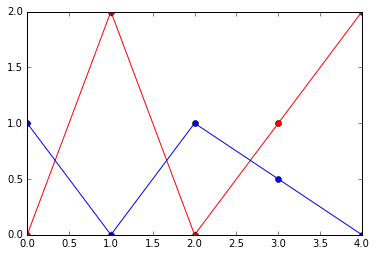

In [5]:
A = np.array([0, 2, 0, 1, 2]); B = 1-A*0.5
plt.plot(np.arange(5), A, 'ro-')
plt.plot(np.arange(5), B, 'bo-')

### Question: What's the correlation between A and B? 
Do you know the answer without using the code?

In [ ]:
# Scatter plot is useful in checking correlation
plt.plot(A, B)

pearsonr(A, B)

Exercise: Create two random variables whose pearson correlation is low (or non-significant). 

In [ ]:
# You code here








### Mutual information 
The concept of mutual information is intricately linked to that of *entropy* of a random variable, a fundamental notion in information theory, that defines the "amount of information" held in a random variable. [wiki](https://en.wikipedia.org/wiki/Mutual_information) 

Formally, the mutual information of two discrete random variables X and Y can be defined as:

${\displaystyle I(X;Y)=\sum _{y\in Y}\sum _{x\in X}p(x,y)\log {\left({\frac {p(x,y)}{p(x)\,p(y)}}\right)},\,\!}$

where $p(x,y)$ is the joint probability distribution function of X and Y, and ${\displaystyle p(x)}$ $p(x)$ and ${\displaystyle p(y)} p(y)$ are the marginal probability distribution functions of X and Y respectively.

Scikit-learn has got feature_selection modules that can compute mutual information both for classification and regression problems. See <scikit-learn>(http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)

### Feature selection related
Scikit-learn provides a variety of univariate feature selection methods both univarite and mulitivariate, see <scikit-learn> (http://scikit-learn.org/stable/modules/feature_selection.html)


### Clustering with scikit-learn

Have a look at the overview of available clustering methods in scikit-learn http://scikit-learn.org/stable/modules/clustering.html


In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as ac
from sklearn.datasets import make_blobs

random_state = 170 # You can change random state and see changes in data examples)
n_samples = 1500
X, y = make_blobs(n_samples=n_samples, random_state=random_state)


In [8]:
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  max_iter : int, default: 300
 |      Maximum number of iterations of the k-means algorithm for a
 |      single run.
 |  
 |  n_init : int, default: 10
 |      Number of time the k-means algorithm will be run with different
 |      centroid seeds. The final results will be the best output of
 |      n_init consecutive runs in terms of inertia.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up co

[0 0 2 ..., 1 2 1]
[1 1 1 ..., 0 0 0]


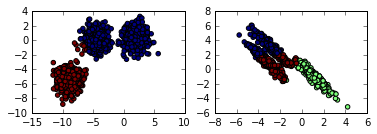

In [16]:
# number of clusters!!!!
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
#plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)
print(y_pred)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
#plt.title("Anisotropicly Distributed Blobs")

y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X_aniso)

print(y_pred)



Exercise: perform the above clustering task using a hierachical method.

Hint: 
- from sklearn.cluster import AgglomerativeClustering
- help(AgglomerativeClustering)
- or go to scikit-learn online document for an example. 

In [ ]:
# Your code here